# 向量测量

## 1. 向量乘法

向量相乘有两种方法: **点积** ($u \cdot v$) 和**向量积** ($u \times v$)

对于数 (标量) 来说, 这两种运算含义相同, 但对于向量来说, 这两种运算的含义完全不同:
- 点积取两个向量并返回一个数 (标量)
- 向量积取两个向量并返回一个新向量

点积和向量积都可以推断出三维空间中向量的长度和方向

In [1]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector
from common.vector import scale, length
from common.vector_draw import (
    Color,
    draw, Points, Arrow,
    draw3d, Points3D, Arrow3D, Segment3D, Box3D,
)
from math import sqrt, sin, cos, pi
from typing import Iterator


### 1.1. 点积

点积 (也叫内积) 是对两个向量的运算, 返回一个标量.

换句话说给定两个向量 $u$ 和 $v$, 那么 $u \cdot v$ 的结果是实数.

点积适用于二维, 三维等任意维度的向量. 它可以被看作测量输入向量对的 **对齐程度**.

**知识**: 计算两个向量的点积

In [2]:
def dot(u: Vector, v: Vector) -> float:
    return sum([coord1 * coord2 for coord1, coord2 in zip(u, v)])


In [3]:
# 定义两个二维向量
u, v = (1, 1), (2, 2)

# 对两个向量进行点积计算
r = dot(u, v)

# 输出计算结果
r


4

**知识:** 大致对齐的两个向量给出一个大的正点积

指向相似方向的两个向量的点积为正, 并且向量越大, 乘积就越大

20.41


TypeError: 'float' object is not subscriptable

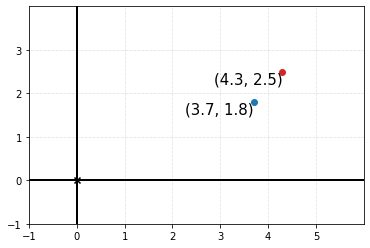

In [4]:
# 定义两个向量
u, v = (3.7, 1.8), (4.3, 2.5)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


27.01


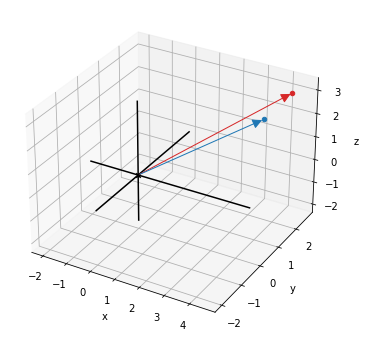

In [ ]:
# 定义两个向量
u, v = (3.7, 1.8, 2.2), (4.3, 2.5, 3.0)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


指向相似方向的两个较短向量, 点积较小但仍为正

3.9299999999999997


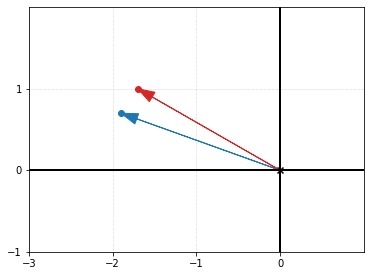

In [ ]:
# 定义两个向量
u, v = (-1.9, 0.7), (-1.7, 1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


6.33


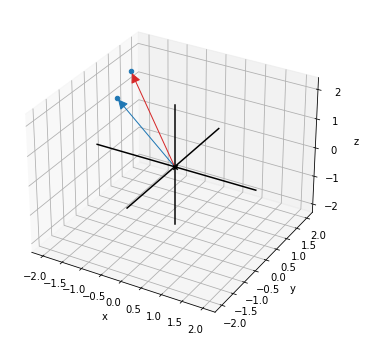

In [ ]:
# 定义两个向量
u, v = (-1.9, 0.7, 1.2), (-1.7, 1, 2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.blue),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**知识:** 点积为负数的两个向量方向相反

如果两个向量指向相反或大致相反的方向, 则其点积为负

向量越长, 则点积的负值越小

-11.700000000000001


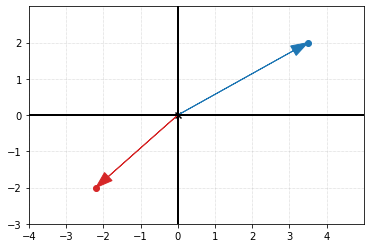

In [ ]:
# 定义两个向量
u, v = (3.5, 2), (-2.2, -2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


-14.22


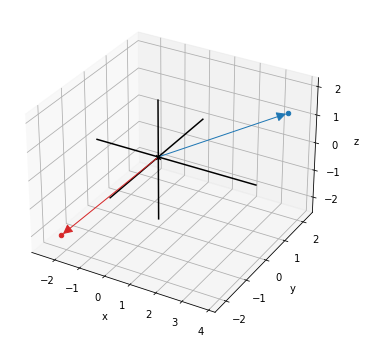

In [ ]:
# 定义两个向量
u, v = (3.5, 2, 1.2), (-2.2, -2, -2.1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


指向相反方向的较短向量, 点积较大但仍为负数

-2.4


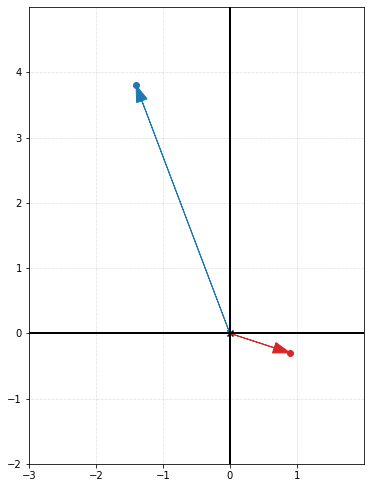

In [ ]:
# 定义两个向量
u, v = (-1.4, 3.8), (0.9, -0.3)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


-2.88


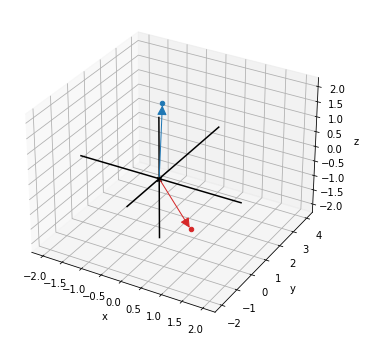

In [ ]:
# 定义两个向量
u, v = (-1.4, 3.8, 0.4), (0.9, -0.3, -1.2)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**知识:** 点积为 `0` 的两个向量相互垂直

如果两个向量的方向完全垂直, 那么无论它们的长度如何, 点积都是零

这是点积最重要的应用之一: 
- 在不做任何三角运算的情况下, 计算两个向量是否垂直
- 如果两个向量的夹角小于 `90°`, 则向量的点积为正
- 如果夹角大于 `90°`, 则向量的点积为负

0.0


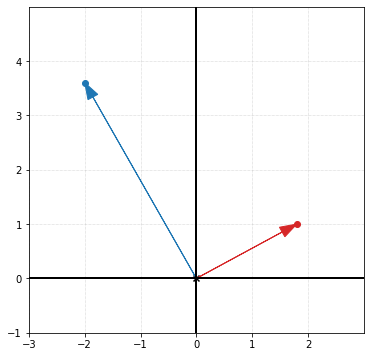

In [ ]:
# 定义两个向量
u, v = (-2, 3.6), (1.8, 1)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
)


1.7763568394002505e-15


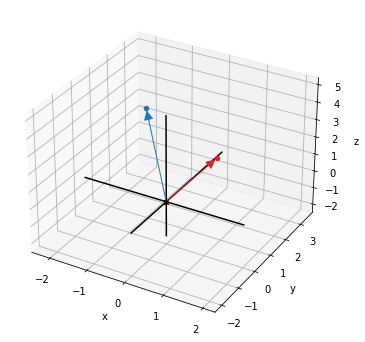

In [ ]:
# 定义两个向量
u, v = (-2, 3.2, 1.6), (1.8, -1.2, 4.65)

# 计算向量的点积
r = dot(u, v)
print(f"{r}")

# 绘制向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**练习:** 位于不同轴上的两个向量的点积为零, 说明它们是互相垂直的

对于 `(1, 0)` 和 `(0, 2)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

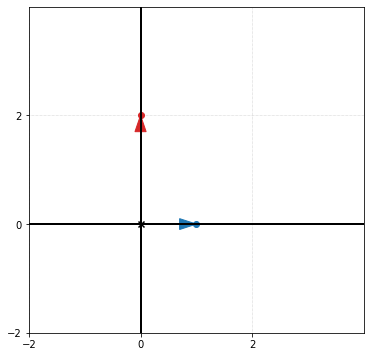

In [ ]:
# 定义两个二维向量
u, v = (1, 0), (0, 2)
# 计算二维向量的点积
r = dot(u, v)

# 绘制相互垂直的二维向量
draw(
    Points(u, color=Color.blue),
    Points(v, color=Color.red),
    Arrow(u, color=Color.blue),
    Arrow(v, color=Color.red),
    grid=(2, 2)
)


对于 `(0, 3, 0)` 和 `(0, 0, -5)` 的点积, 点积结果为 `0`, 说明这两个向量相互垂直

三维空间的向量垂直很难直接从坐标系上观察到, 用点积可以更容易得到结论

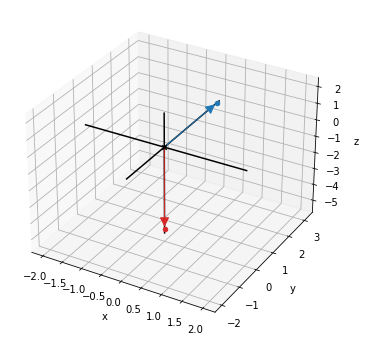

In [ ]:
# 定义两个三维向量
u, v = (0, 3, 0), (0, 0, -5)
# 计算三维向量的点积
r = dot(u, v)

# 绘制相互垂直的三维向量
draw3d(
    Points3D(u, color=Color.blue),
    Points3D(v, color=Color.red),
    Arrow3D(u, color=Color.blue),
    Arrow3D(v, color=Color.red),
)


**练习:** 向量越长，其点积的绝对值越大

对于二维向量 `(3, 4)` 和 `(2, 3)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [ ]:
# 定义两个二维向量
u, v = (3, 4), (2, 3)

# 计算原始点积
r1 = dot(u, v)
print(r1)

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(u, 2), v)
print(r2)

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(v, 2))
print(r3)


18
36
36


对于三维向量 `(3, 4, 5)` 和 `(2, 3, 4)`, 将其任意一个向量放大 `2` 倍, 测量其点积的变化

In [ ]:
# 定义两个三维向量
u, v = (3, 4, 5), (2, 3, 4)

# 计算原始点积
r1 = dot(u, v)
print(r1)

# 将 u 向量放大 2 倍, 检查点积是否也放大 2 倍
r2 = dot(scale(u, 2), v)
print(r2)

# 将 v 向量放大 2 倍, 检查点积是否也放大 2 倍
r3 = dot(u, scale(v, 2))
print(r3)


38
76
76


**知识:** 点积的绝对值与其输入向量的长度成正比. 如果取同方向两个向量的点积, 那么点积就等于两个向量长度的乘积

In [ ]:
# 定义两个向量
u, v = (4, 3), (8, 5)

# 求两个向量长度的乘积
len_u = length(u)
len_v = length(v)
print(f"len(u) * len(v) = {len_u * len_v}")

# 求两个向量的点积
r = dot(u, v)
print(f"dot(u, v) = {r}")

# 方向相近的两个向量, 点积接近长度的乘积


len(u) * len(v) = 47.169905660283014
dot(u, v) = 47


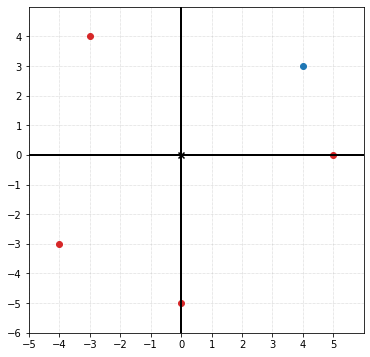

In [ ]:
u = (4, 3)
v1, v2, v3, v4 = (5, 0), (-3, 4), (0, -5), (-4, -3)

draw(
    Points(u, color=Color.blue),
    Points(v1, color=Color.red),
    Points(v2, color=Color.red),
    Points(v3, color=Color.red),
    Points(v4, color=Color.red),
)
